In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('taxi_trip_pricing.csv') #read file

# 1. Data Exploration
print(df.shape)  #Dimensions
print(df.head()) #First 5 rows
print(df.info())
print(df.describe()) #Summary statistics
print(df.isnull().sum()) #Missing values

(1000, 11)
   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3        

In [3]:
# 2. Data Cleaning

# Handle missing values
# For numerical columns, fill with median (less sensitive to outliers)
num_cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
            'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill with mode
cat_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


print(df.isnull().sum())# Check for any Missing values after cleaning


Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64


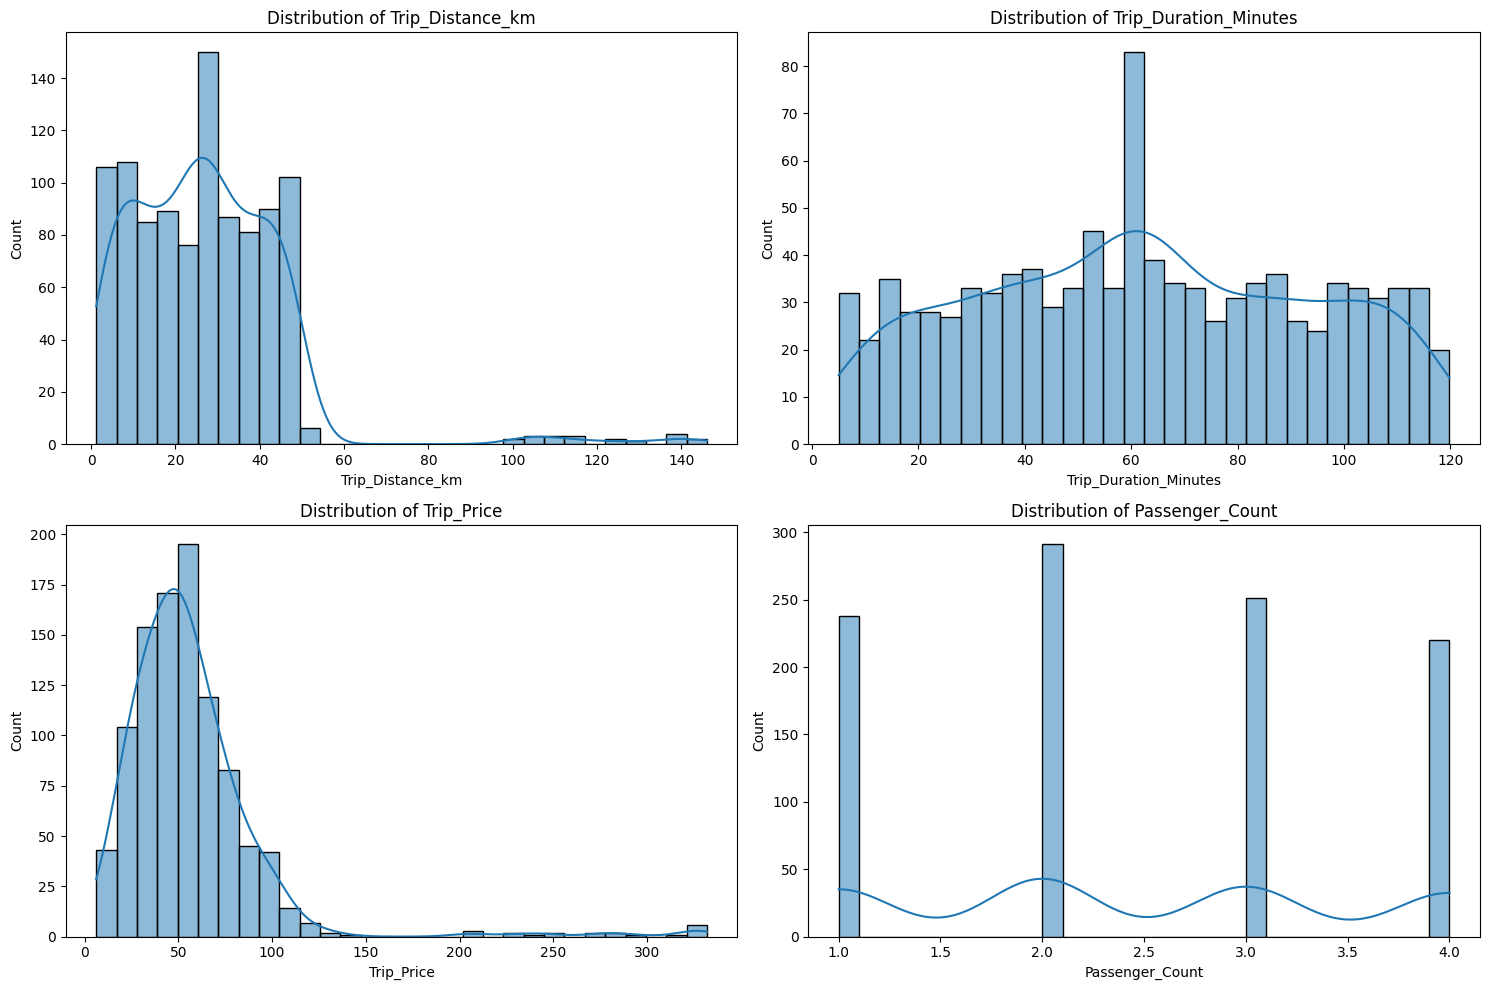

In [4]:
# 3. Data Visualization

# Distribution of numerical variables
num_vars = ['Trip_Distance_km', 'Trip_Duration_Minutes', 'Trip_Price', 'Passenger_Count']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

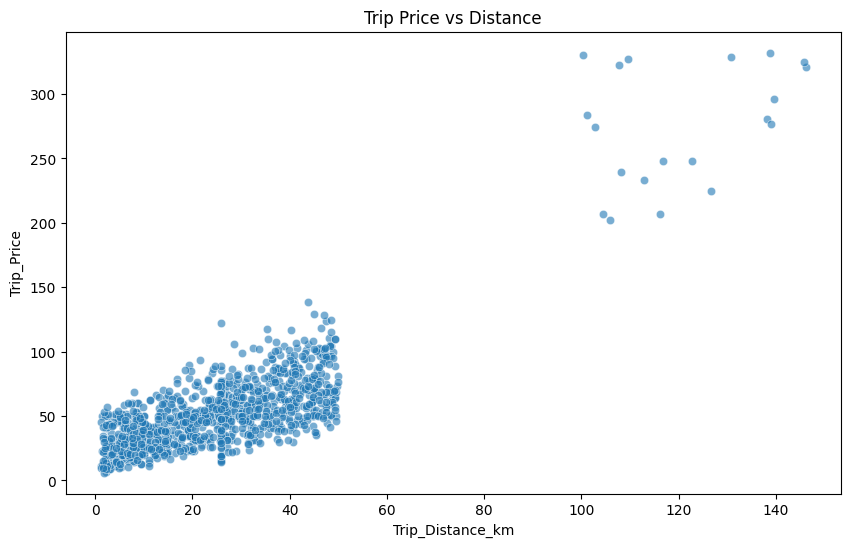

In [5]:
# Trip Price vs Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=df, alpha=0.6)
plt.title('Trip Price vs Distance')
plt.show()

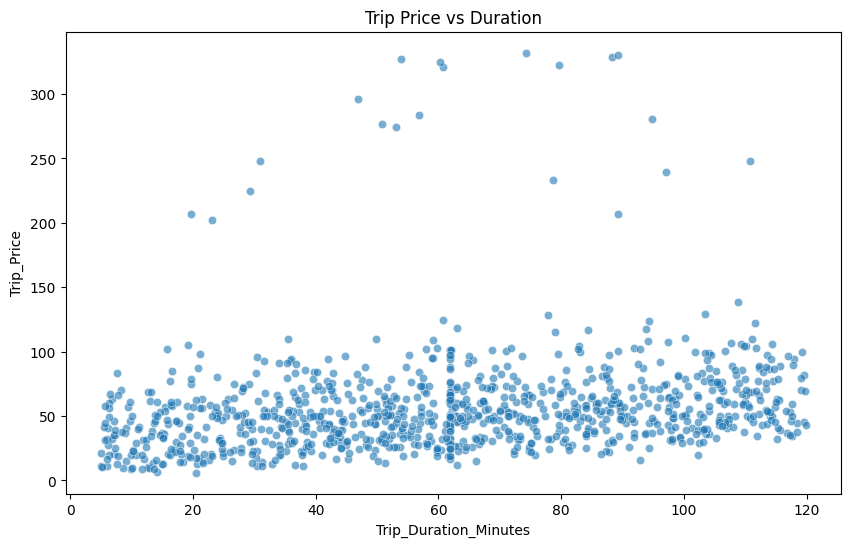

In [7]:
# Trip Price vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trip_Duration_Minutes', y='Trip_Price', data=df, alpha=0.6)
plt.title('Trip Price vs Duration')
plt.show()


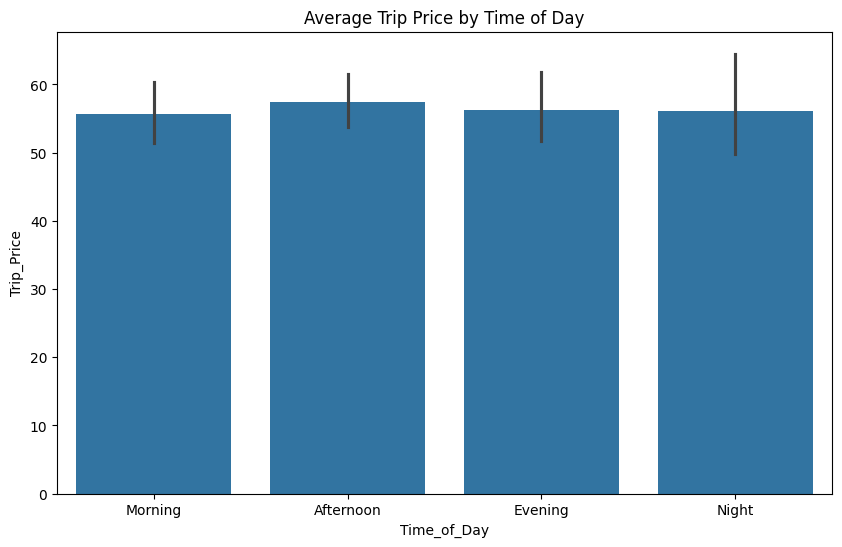

In [8]:
# Average price by time of day
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_of_Day', y='Trip_Price', data=df, estimator=np.mean)
plt.title('Average Trip Price by Time of Day')
plt.show()

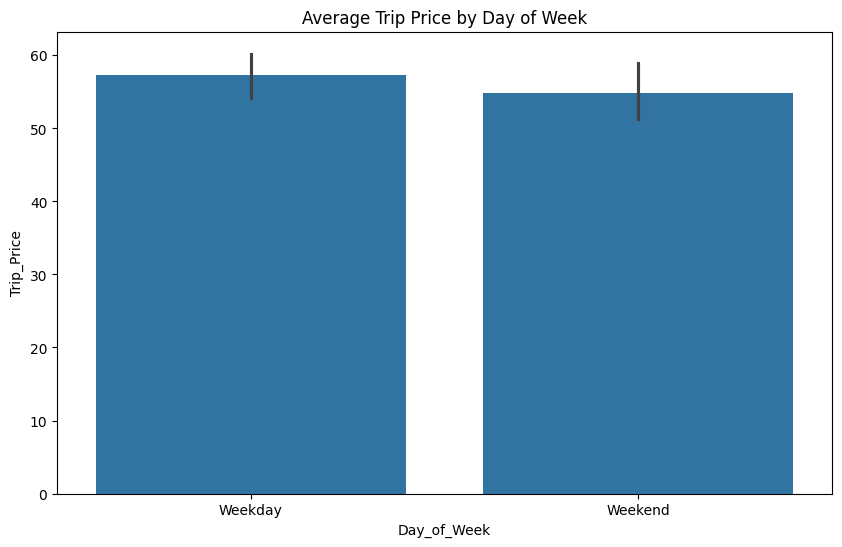

In [9]:
# Average price by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Trip_Price', data=df, estimator=np.mean)
plt.title('Average Trip Price by Day of Week')
plt.show()


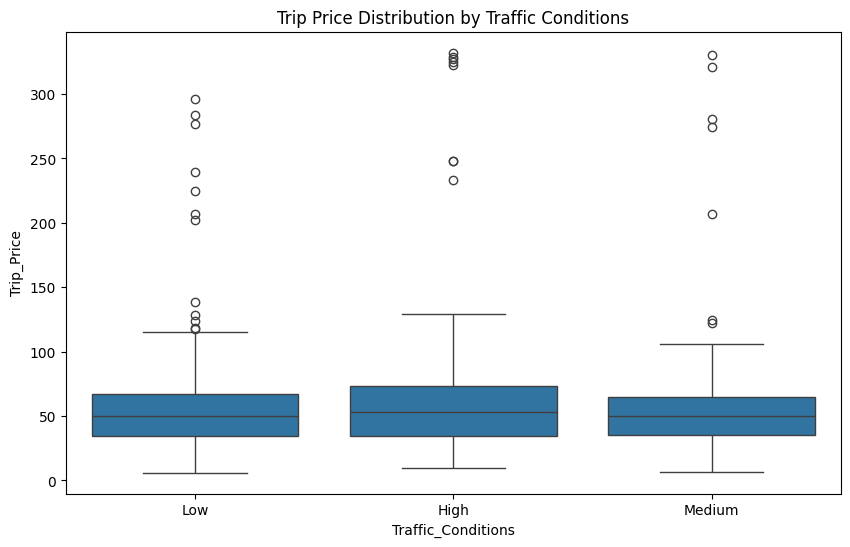

In [10]:

# Price distribution by traffic conditions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic_Conditions', y='Trip_Price', data=df)
plt.title('Trip Price Distribution by Traffic Conditions')
plt.show()

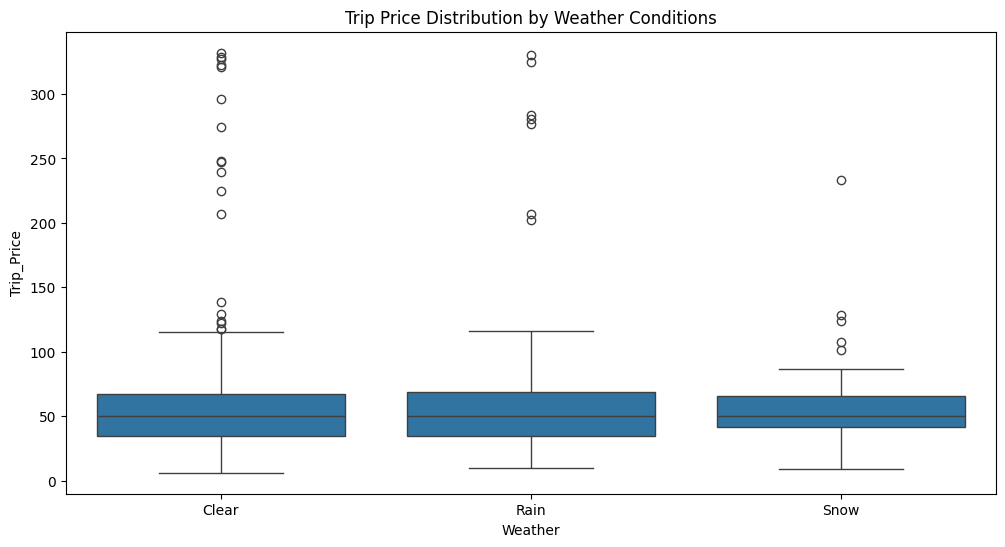

In [11]:

# Price distribution by weather
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Trip_Price', data=df)
plt.title('Trip Price Distribution by Weather Conditions')
plt.show()

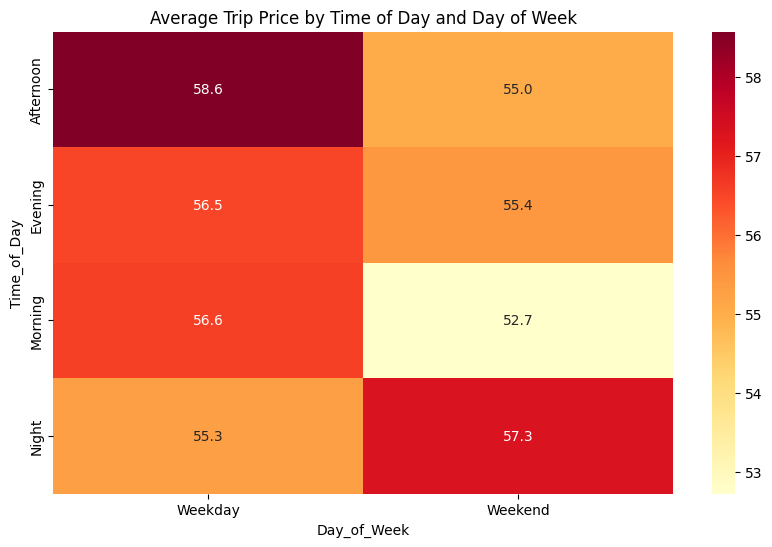

In [12]:
# Time of day vs Day of week heatmap
time_day_heatmap = df.groupby(['Time_of_Day', 'Day_of_Week'])['Trip_Price'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(time_day_heatmap, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Average Trip Price by Time of Day and Day of Week')
plt.show()

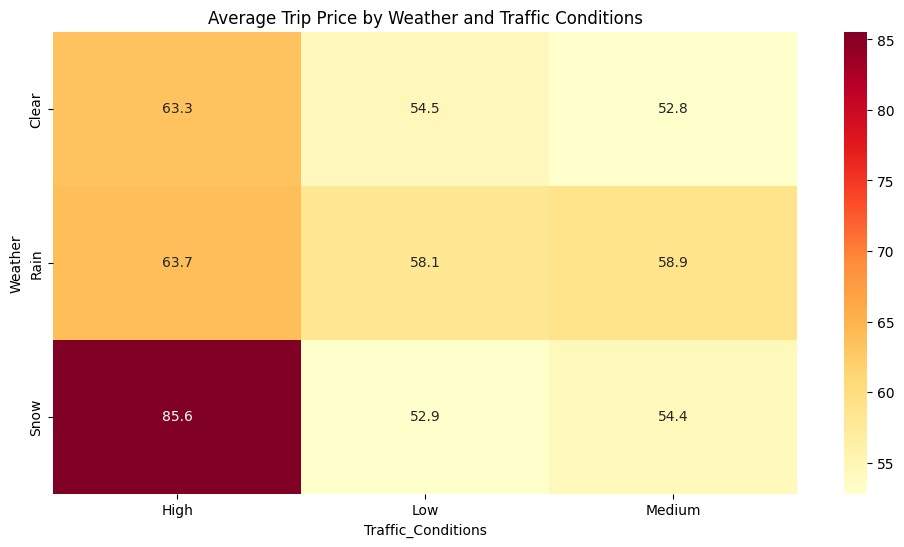

In [13]:
# Weather vs Traffic Conditions heatmap
weather_traffic_heatmap = df.groupby(['Weather', 'Traffic_Conditions'])['Trip_Price'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(weather_traffic_heatmap, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Average Trip Price by Weather and Traffic Conditions')
plt.show()


#Conclusion
 From the visualizations, it's evident that trip distance and duration have a strong correlation with
 price. Prices tend to be higher during peak hours and under adverse traffic and weather conditions.
 This analysis can aid in dynamic pricing strategies.

In [14]:

df = pd.read_csv("Heart Prediction Quantum Dataset.csv") #read file

# 1. Data Exploration
print(df.shape)  #Dimensions
print(df.head()) #First 5 rows
print(df.info())
print(df.describe()) #Summary statistics
print(df.isnull().sum()) #Missing values

(500, 7)
   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-nu

# (No specific cleaning needed for now based on exploration)

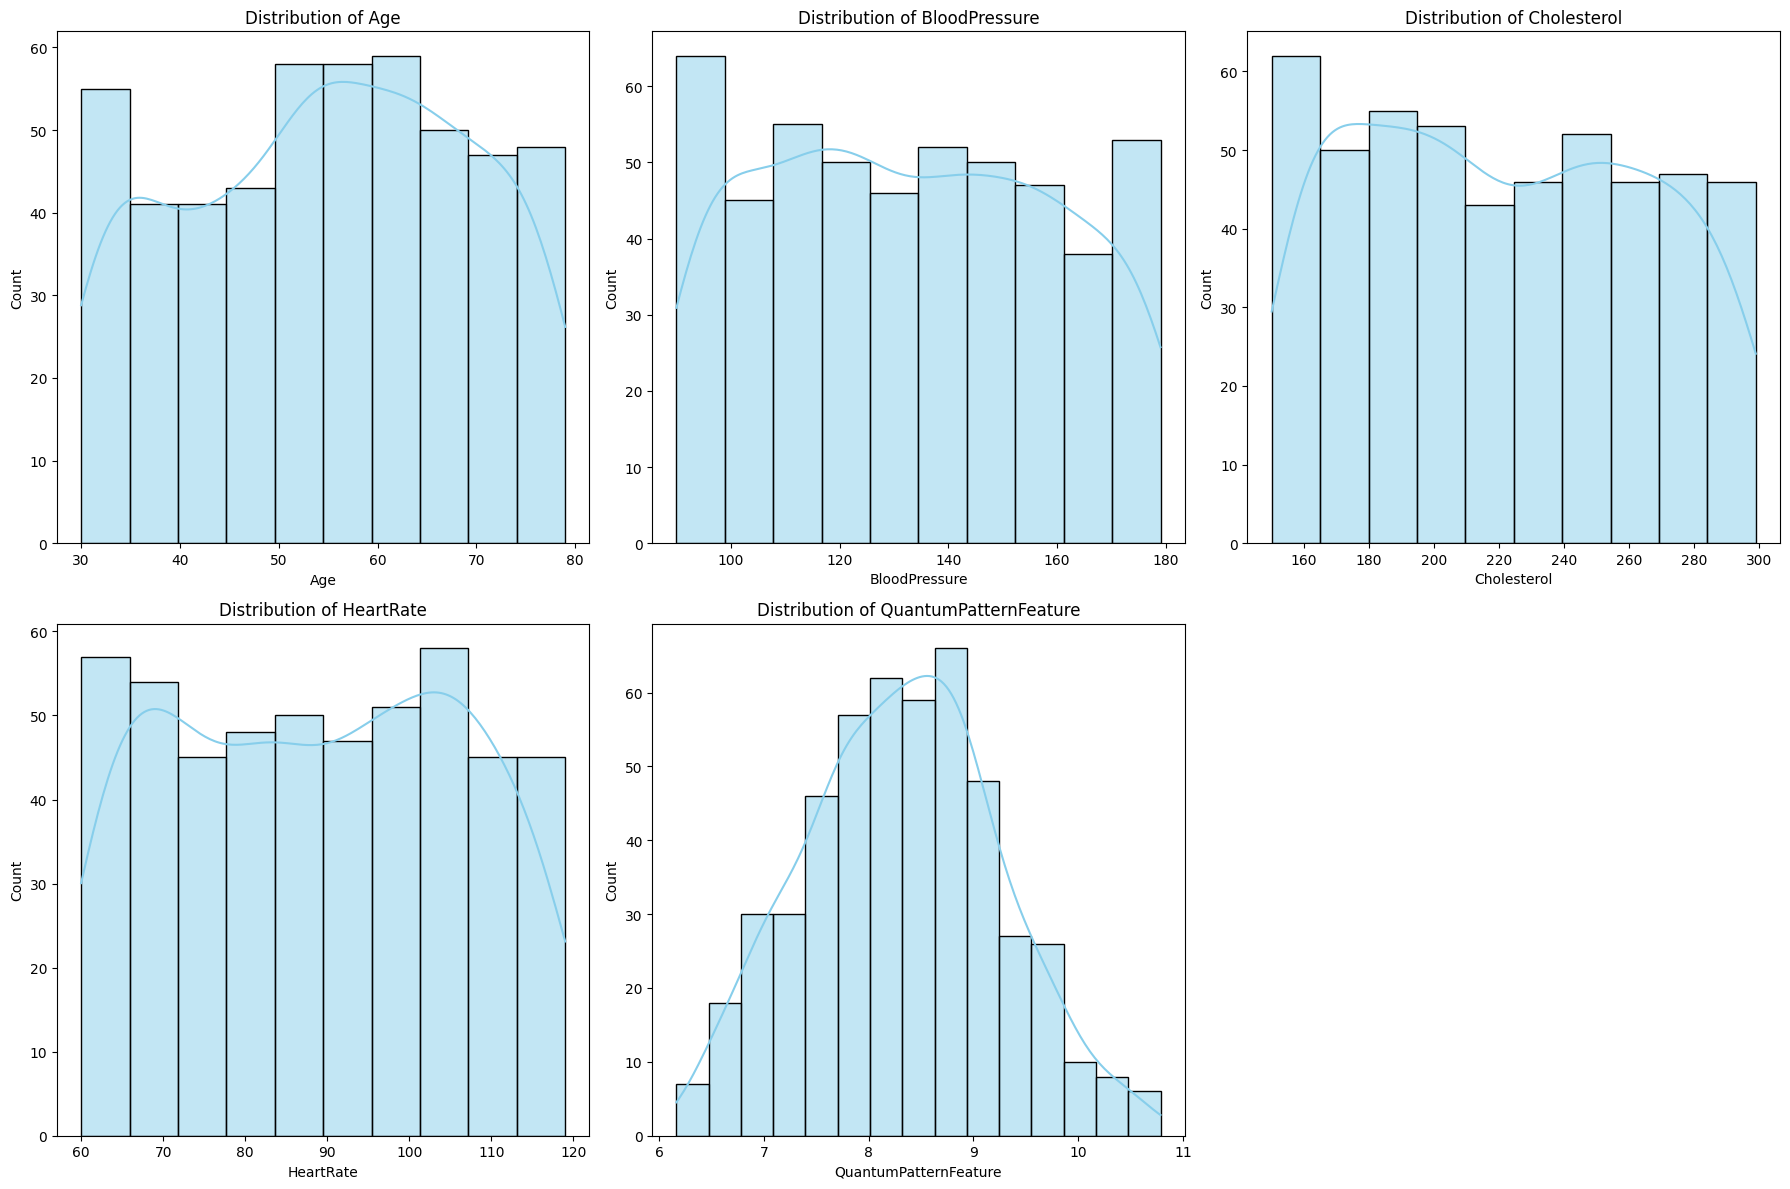

In [15]:
# 3. Visualization

plt.figure(figsize=(18, 12))
numerical_cols = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']
for i, col in enumerate(numerical_cols):
   plt.subplot(2, 3, i + 1)
   sns.histplot(df[col], kde=True, color='skyblue')
   plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

C:\Users\YoussefAmr\AppData\Local\Temp\ipykernel_5560\286035310.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Age", y="HeartDisease", alpha=0.7, palette="coolwarm", s=60)


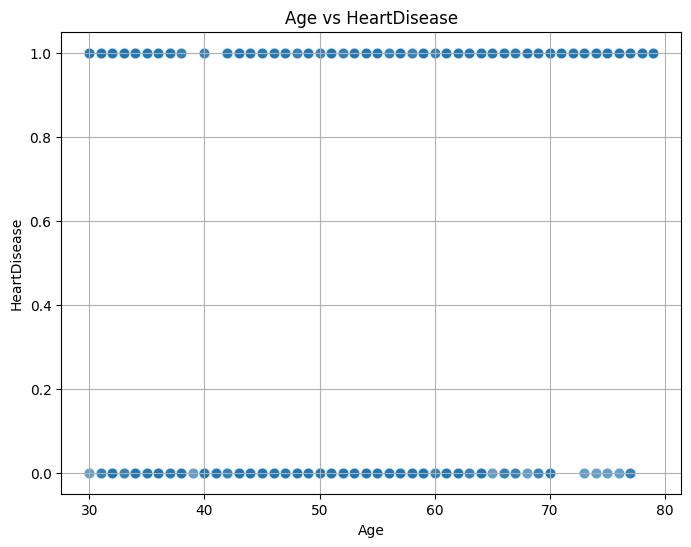

In [16]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="HeartDisease", alpha=0.7, palette="coolwarm", s=60)
plt.title("Age vs HeartDisease")
plt.xlabel("Age")
plt.ylabel("HeartDisease")
plt.grid(True)
plt.show()


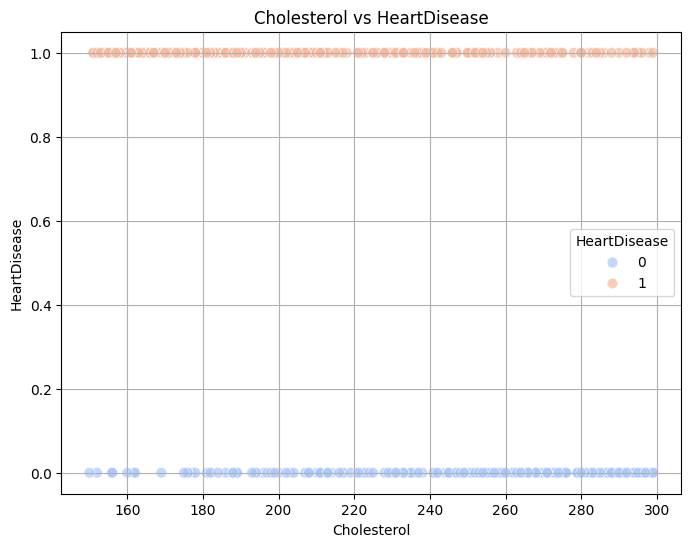

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Cholesterol", y="HeartDisease", alpha=0.7,hue='HeartDisease', palette="coolwarm", s=60)
plt.title("Cholesterol vs HeartDisease")
plt.xlabel("Cholesterol")
plt.ylabel("HeartDisease")
plt.grid(True)
plt.show()


C:\Users\YoussefAmr\AppData\Local\Temp\ipykernel_5560\4260104308.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Gender", y="Cholesterol", alpha=0.7, palette="coolwarm", s=60)


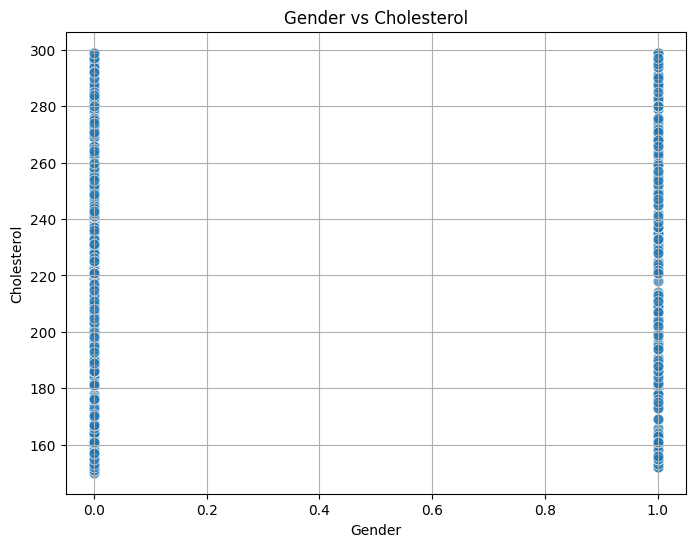

In [18]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Gender", y="Cholesterol", alpha=0.7, palette="coolwarm", s=60)
plt.title("Gender vs Cholesterol")
plt.xlabel("Gender")
plt.ylabel("Cholesterol")
plt.grid(True)
plt.show()


Conclusion:

    Men are more likely to struggle with managing heart health compared to women.

    High cholesterol levels are a significant contributor to heart disease.

    Age does not have a significant effect on the likelihood of developing heart disease.

    Gender and cholesterol should be prioritized in heart disease prevention and management strategies.

    this part was made by يوسف عبد المحسن محمد id: 23011643

In [20]:
import pandas as pd
import seaborn as sns                           #Importing necessary packages 
import matplotlib.pyplot as plt

file_name = 'taxi_trip_pricing.csv'

df = pd.read_csv(file_name)                     #reading the dataset

In [21]:

df = df.dropna(axis=0)                          #droping the null values
df = df.drop_duplicates()                       #droping the duplicates

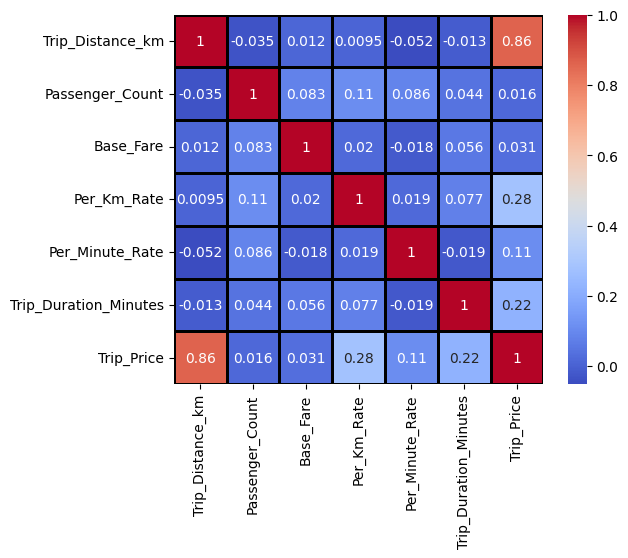

In [22]:
sns.heatmap(df[['Trip_Distance_km', 'Passenger_Count','Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']].corr(), annot=True,cmap='coolwarm', linecolor='black', linewidths= 2, square=True)
plt.show()                                       #calculating the correlate between the different columns and ploting it in a heatmap plot

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler                                    #Importing necessary packages 

x = df[['Trip_Distance_km', 'Passenger_Count', 'Per_Km_Rate', 'Per_Minute_Rate']]   #separating the important features
y = df['Trip_Price']                                                                #separating the final values

scaler = StandardScaler()                                                           #defining a scaler
X_scaled = scaler.fit_transform(x)                                                  #scalling the different features

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.80, random_state=50)
                                                                                    #splitting the scaled data to training and test data


R2:  0.6930722421540787
MSE:  512.43392331419


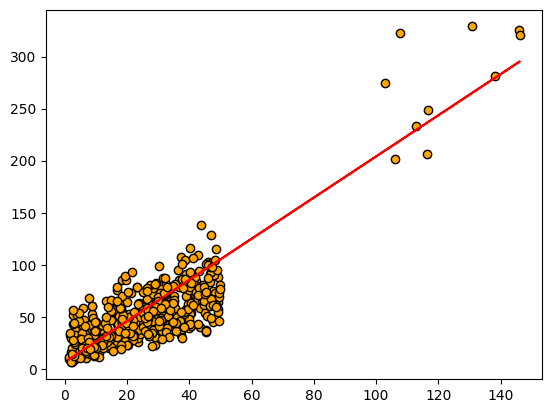

In [24]:
#simple linear regression
from sklearn.linear_model import LinearRegression                                   #Importing necessary packages 
from sklearn.metrics import mean_squared_error, r2_score, jaccard_score

X_simple = df[['Trip_Distance_km']].values                                          #separating the input feature
y= df['Trip_Price'].values                                                          #separating the final values

x_train, x_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.80, random_state=50)
                                                                                    #splitting the data to training and test data
model = LinearRegression()                                                          #initializing the linear model
model.fit(x_train, y_train)                                                         #train the model on training data

y_perd = model.predict(x_test)                                                      #calculating the predictions

print("R2: ", r2_score(y_test, y_perd))                                             #calculating the coefficient of determination and displaying it
print("MSE: ", mean_squared_error(y_test, y_perd))                                  #calculating the mean square error and displaying it 

plt.scatter(x_test, y_test, color='orange', edgecolors='black')                                         #drawing a scatter plot of the test data
plt.plot(x_test, y_perd, color='red')                                               #drawing the linear model
plt.show()                                                                          #showing the plots


In [25]:
# Muliple Linear regression
X_simple = df[['Trip_Distance_km', 'Passenger_Count', 'Per_Km_Rate', 'Per_Minute_Rate']].values         #saparating the inputs features
y= df['Trip_Price'].values                                                                              #saparating the output

x_train, x_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.80, random_state=50)       #dividing the data

model = LinearRegression()                                                                              #initializing the linear model
model.fit(x_train, y_train)                                                                             #training the model on training data

y_perd = model.predict(x_test)                                                                          #calculating the predictions

print("R2: ", r2_score(y_test, y_perd))                                                                 #calculating the coefficient of determination and displaying it
print("MSE: ", mean_squared_error(y_test, y_perd))                                                      #calculating the mean square error and displaying it 


R2:  0.8039657009509551
MSE:  327.29077901216664


degree 2 R2:  0.8132247148457288
degree 2 MSE:  311.8323113603055
degree 3 R2:  0.6692051900853135
degree 3 MSE:  552.2813689000044
degree 4 R2:  -9.289262097243302
degree 4 MSE:  17178.527551571988


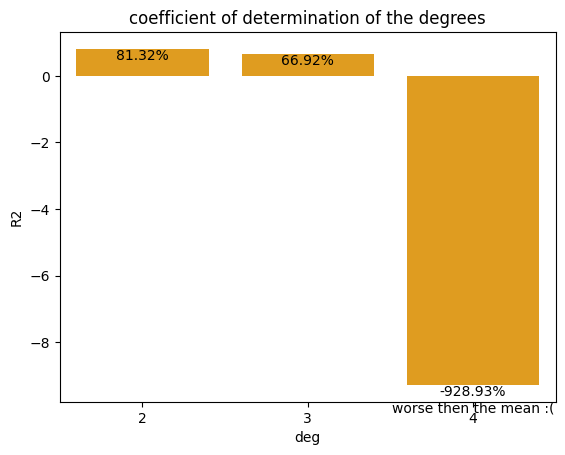

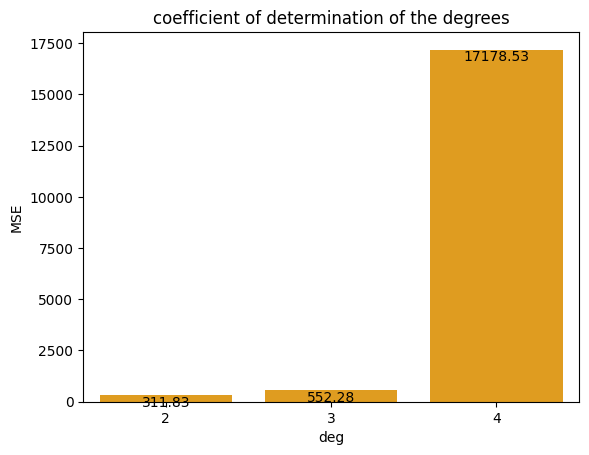

In [26]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures                            #Importing necessary packages
from sklearn.pipeline import make_pipeline

results = []

for deg in [2,3,4]:                                                             #looping over the selected degrees
    poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())     #initializing the model and setting it's degree
    poly_model.fit(x_train, y_train)                                            #training the model on the training data
    y_perd = poly_model.predict(x_test)                                         #calculating the predictions

    results.append({"deg": deg
                    ,"R2":r2_score(y_test, y_perd)                              #saving the results for visualization
                    ,"MSE": mean_squared_error(y_test,y_perd)}) 
                  
    print(f"degree {deg} R2: ", r2_score(y_test, y_perd))                       #calculating the coefficient of determination and displaying it  
    print(f"degree {deg} MSE: ", mean_squared_error(y_test,y_perd))             #calculating the mean square error and displaying it 

results = pd.DataFrame(results)                                                 #converting the results dict. to a dataframe

sns.barplot(results, x='deg', y='R2', color='orange')                           #drawing a bar plot for every degree
for i, raw in results.iterrows():                                               #adding the R2 of every degree on the top of every degree bar
    plt.text(x=i,y=raw['R2'], 
             s= f'{round(raw['R2']*100,2)}%' if raw['R2'] > 0 else f'{str(round(raw['R2'] *100,2))}%\nworse then the mean :(',
             ha='center', va='top', fontsize=10, zorder =2)
plt.title('coefficient of determination of the degrees')                        #setting the plot title
plt.show()                                                                      #showing the plot


sns.barplot(results, x='deg', y='MSE', color='orange')                          #drawing a bar plot for every degree
for i, raw in results.iterrows():                                               #adding the MSE of every degree on the top of every degree bar
    plt.text(x=i,y=raw['MSE'], s= str(round(raw['MSE'],2)),
              ha='center', va='top', fontsize=10, zorder =2)
plt.title('coefficient of determination of the degrees')                        #setting the plot title
plt.show()                                                                      #showing the plot

In [27]:
# logistic regression
from sklearn.linear_model import LogisticRegression                                                 #Importing necessary packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['Day_of_Week'] = df['Day_of_Week'].replace({'Weekday':1, 'Weekend':2})                           #converting the day of week column from strings to numebrs 1 and 2
X_simple = df[['Trip_Distance_km', 'Passenger_Count', 'Trip_Price']].values                         #saparating the inputs features
y= df['Day_of_Week'].values                                                                         #saparating the output

x_train, x_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.80, random_state=50)   #dividing the data

model = LogisticRegression()                                                                        #initializing the logistic model
model.fit(x_train, y_train)                                                                         #training the model on the training data

y_perd = model.predict(x_test)                                                                      #calculating the predictions

print('accuracy', accuracy_score(y_test, y_perd))                                                   #calculating the model accuracy and displaying it
print('classification report: ', classification_report(y_test, y_perd))                             #calculating the classification report and displaying it
print('Confusion matrix: ', confusion_matrix(y_test, y_perd))                                       #calculating confusion matrix and displaying it


accuracy 0.6622222222222223
classification report:                precision    recall  f1-score   support

           1       0.66      1.00      0.80       298
           2       0.00      0.00      0.00       152

    accuracy                           0.66       450
   macro avg       0.33      0.50      0.40       450
weighted avg       0.44      0.66      0.53       450

Confusion matrix:  [[298   0]
 [152   0]]


C:\Users\YoussefAmr\AppData\Local\Temp\ipykernel_5560\3405281999.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_of_Week'] = df['Day_of_Week'].replace({'Weekday':1, 'Weekend':2})                           #converting the day of week column from strings to numebrs 1 and 2
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

Taxi Pricing Model Analysis
Key Findings

    Trip price increases with:

        Total distance of the trip.
        Number of passengers.
        weather statu.

        These features show a positive correlation with trip price.

    Model performance degrades with higher-degree polynomials:

        Increasing the degree of a polynomial regression model results in worse performance.
        Suggests a classic case of overfitting.

        this part was made by يوسف عمرو عبد العال id: 23011648

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [29]:
raw_data=pd.read_csv('Heart Prediction Quantum Dataset.csv')
raw_data.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [30]:
Model_Data=raw_data.drop(['Age','Gender','BloodPressure','Cholesterol','HeartRate'], axis=1) # Drop Classical Indicators 
Model_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   QuantumPatternFeature  500 non-null    float64
 1   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [31]:
Model_Data['QuantumPatternFeature'].describe()

count    500.000000
mean       8.317407
std        0.919629
min        6.164692
25%        7.675779
50%        8.323064
75%        8.935999
max       10.784886
Name: QuantumPatternFeature, dtype: float64

In [32]:
X = Model_Data[['QuantumPatternFeature']]  
y = Model_Data['HeartDisease']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.92      0.96        60

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



Conclusion:

    Men are more likely to struggle with managing heart health compared to women.

    High cholesterol levels are a significant contributor to heart disease.

    Age does not have a significant effect on the likelihood of developing heart disease.

    A machine learning model was trained on the dataset and achieved 95% accuracy, demonstrating strong predictive capability.

    The high model accuracy supports the reliability of the identified patterns, especially regarding gender and cholesterol as key factors.

    this part was made by عبد الله سامى ابراهيم id: 23011336

Machine learning models have shown strong potential in identifying patterns in health data that might not be obvious through traditional statistical methods. In this study:

- The model was able to **accurately predict heart disease outcomes**, demonstrating the effectiveness of data-driven approaches.
- **Predictive analytics** can help detect at-risk individuals early, enabling preventive action before symptoms appear.
- **Automated insights** generated by models can support doctors in decision-making and reduce diagnostic errors.
- With continuous data collection and model retraining, **machine learning systems can evolve and improve**, providing even better healthcare solutions in the future.

> Embracing machine learning in healthcare opens the door to personalized treatment plans, real-time monitoring, and proactive prevention strategies that can ultimately save lives.
